In [1]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os 
os.chdir("/content/drive/MyDrive/spiltNN/hello_world/")
!ls

hello_world_split1.ipynb  hello_world_split2.ipynb


In [3]:
# TensorFlow is an open source machine learning library
import tensorflow as tf

# Keras is TensorFlow's high-level API for deep learning
from tensorflow import keras
# Numpy is a math library
import numpy as np
# Pandas is a data manipulation library 
import pandas as pd
# Matplotlib is a graphing library
import matplotlib.pyplot as plt
# Math is Python's math library
import math
from tensorflow.keras import backend as K

# Set seed for experiment reproducibility
seed = 1
np.random.seed(seed)
tf.random.set_seed(seed)

## Create model schema

In [14]:
split2_model = tf.keras.Sequential()

# The new second and third layer will help the network learn more complex representations
split2_model.add(keras.layers.Dense(16, activation='relu',name="second_layer",input_shape=(16,)))

# Final layer is a single neuron, since we want to output a single value
split2_model.add(keras.layers.Dense(1,name="output_layer"))

In [15]:
split2_model.load_weights("hello_world_model.h5", by_name=True)
split2_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 second_layer (Dense)        (None, 16)                272       
                                                                 
 output_layer (Dense)        (None, 1)                 17        
                                                                 
Total params: 289
Trainable params: 289
Non-trainable params: 0
_________________________________________________________________


## Read the variable of the output layer and save it 

In [25]:
import pickle
with open('output_split.pickle', 'rb') as handle:
    split_input = pickle.load(handle)

In [26]:
type(split_input)

numpy.ndarray

In [33]:
Y = split2_model.predict_on_batch(split_input)
print(Y)

[[-0.7899416 ]
 [-0.7731201 ]
 [-0.32155448]
 [ 1.010501  ]
 [-0.06947042]
 [ 0.1501367 ]
 [ 0.96193796]
 [ 0.7302471 ]
 [-0.17507221]
 [-0.09329076]
 [ 0.9386696 ]
 [-0.6190919 ]
 [-0.7844726 ]
 [-0.8035573 ]
 [ 0.42233282]
 [-0.8875717 ]
 [ 0.99301475]
 [-0.7381895 ]
 [-0.20780952]
 [ 0.61779064]
 [-0.7131493 ]
 [-0.89401823]
 [ 0.9374824 ]
 [-0.5802869 ]
 [ 0.09040432]
 [ 0.26293766]
 [-0.32849038]
 [-0.7643094 ]
 [ 0.9809069 ]
 [-0.6695502 ]
 [ 0.99859494]
 [-0.6249082 ]
 [ 0.9806139 ]
 [ 0.9986642 ]
 [-0.76797193]
 [-0.5824873 ]
 [-0.11085416]
 [-0.42378718]
 [ 0.54446393]
 [-0.8506526 ]
 [ 0.41652906]
 [-0.66124076]
 [-0.6331278 ]
 [ 0.94499904]
 [ 0.4918782 ]
 [ 0.14447583]
 [ 0.30597287]
 [-0.40681434]
 [-0.04781623]
 [ 0.42900795]
 [-0.5549725 ]
 [-0.02921213]
 [-0.5610976 ]
 [-0.6204226 ]
 [-0.74160826]
 [-0.23285975]
 [-0.8127726 ]
 [ 0.590986  ]
 [ 0.94832593]
 [-0.5997235 ]
 [ 0.22282128]
 [-0.41586816]
 [ 0.54735535]
 [-0.8224376 ]
 [ 1.000208  ]
 [-0.46437126]
 [-0.75254

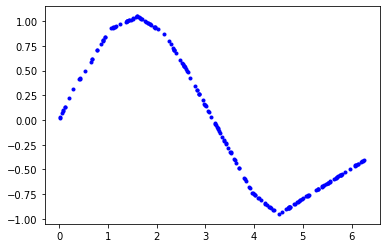

In [36]:
with open('x_test.pickle', 'rb') as handle:
    x_test = pickle.load(handle)
# Plot our data. The 'b.' argument tells the library to print blue dots.
plt.plot(x_test, Y, 'b.')
plt.show()